# Intro to Pandas

## Starting out

In [1]:
import pandas as pd

*By convention, `pandas` is abbreviated as `pd` for Python code!*

## Creating a DataFrame

### From a dictionary of lists

In [2]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [3]:
df.dtypes

col1    int64
col2    int64
dtype: object

### From mixed types

In [112]:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


### From lists of dictionaries

In [5]:
pd.DataFrame([{'col1': 0}, {'col1': 1}, {'col1': 2, 'col2': 2.}, {'col1': 3, 'col2': 3}])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


### From lists

In [6]:
pd.DataFrame([[0], [1], [2, 2], [3, 3]], columns=['col1', 'col2'])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


### From NumPy arrays

In [7]:
import numpy as np
pd.DataFrame(np.array([[0, np.NAN], [1, np.NAN], [2, 2], [3, 3]]), columns=['col1', 'col2'])

,col1,col2
0,0.0,NaN
1,1.0,NaN
2,2.0,2.0
3,3.0,3.0


### From DataClasses

In [8]:
from dataclasses import dataclass
@dataclass
class MyDataClass:
    col1: float = None
    col2: float = None

In [9]:
pd.DataFrame([MyDataClass(0), MyDataClass(1), MyDataClass(2, 2), MyDataClass(3, 3)])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


## Creating a `DataSeries

In [10]:
pd.Series({'a': 1, 'b': 2, 'c': 3})

a    1
b    2
c    3
dtype: int64

*Note*: It applied the `keys` above

In [11]:
pd.Series({'a': 1, 'b': 2, 'c': 3}, index=['a', 'b', 'c'])

a    1
b    2
c    3
dtype: int64

In [12]:
pd.Series([1, 2])

0    1
1    2
dtype: int64

In [13]:
pd.Series(np.array([1, 2]))

0    1
1    2
dtype: int64

## Reading data

####  `read_csv`

In [14]:
titantic_df = pd.read_csv('titanic.csv')
titantic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
titantic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
titantic_df.to_xml()

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<data>\n  <row>\n    <index>0</index>\n    <PassengerId>1</PassengerId>\n    <Survived>0</Survived>\n    <Pclass>3</Pclass>\n    <Name>Braund, Mr. Owen Harris</Name>\n    <Sex>male</Sex>\n    <Age>22.0</Age>\n    <SibSp>1</SibSp>\n    <Parch>0</Parch>\n    <Ticket>A/5 21171</Ticket>\n    <Fare>7.25</Fare>\n    <Cabin/>\n    <Embarked>S</Embarked>\n  </row>\n  <row>\n    <index>1</index>\n    <PassengerId>2</PassengerId>\n    <Survived>1</Survived>\n    <Pclass>1</Pclass>\n    <Name>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</Name>\n    <Sex>female</Sex>\n    <Age>38.0</Age>\n    <SibSp>1</SibSp>\n    <Parch>0</Parch>\n    <Ticket>PC 17599</Ticket>\n    <Fare>71.2833</Fare>\n    <Cabin>C85</Cabin>\n    <Embarked>C</Embarked>\n  </row>\n  <row>\n    <index>2</index>\n    <PassengerId>3</PassengerId>\n    <Survived>1</Survived>\n    <Pclass>3</Pclass>\n    <Name>Heikkinen, Miss. Laina</Name>\n    <Sex>female</Sex>\n    <Age>26.0</Age>\

### Reading from excel

In [17]:
netflix_df = pd.read_excel('netflix_titles.xlsx', sheet_name='netflix_titles')
netflix_df

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13,TV Show,Red vs. Blue,NaN,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4,TV Show,Maron,NaN,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


## Key functions

### `head`

In [18]:
titantic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titantic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### `tail`

In [20]:
titantic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [113]:
titantic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [114]:
titantic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### `index`

In [22]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [23]:
df[0:2]

,col1,col2
0,1,3
1,2,4


In [24]:
col1_df = df.set_index(['col2'])
col1_df

,col1
col2,
3,1
4,2


#### Accessing elements by the actual indexed column

In [25]:
col1_df.loc[3]

col1    1
Name: 3, dtype: int64

In [26]:
col1_df.loc[3:4]

,col1
col2,
3,1
4,2


#### Accessing elements by the actual row-index

In [27]:
col1_df.iloc[0]

col1    1
Name: 3, dtype: int64

In [28]:
col1_df.iloc[0:2]

,col1
col2,
3,1
4,2


In [29]:
col1_df[0:2]

,col1
col2,
3,1
4,2


#### Restoring the row-number as the index

In [30]:
col1_df.reset_index()

,col2,col1
0,3,1
1,4,2


#### Accessing multiple cells

In [31]:
col1_df.iloc[0, 0]

1

In [32]:
col1_df.iloc[0:2, 0:2]

,col1
col2,
3,1
4,2


## Selecting columns

In [33]:
titantic_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
titantic_df[['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


### Filters

In [35]:
titantic_df[titantic_df['Age'] > 35]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [36]:
titantic_df['Age'] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [37]:
condition = titantic_df['Age'] > 25

In [38]:
titantic_df[condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
titantic_df[titantic_df['Age'].map(lambda age: age > 35)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [40]:
titantic_df[(titantic_df['Age'] > 35) & (titantic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [41]:
titantic_df[(titantic_df['Age'] > 35) | (titantic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [42]:
titantic_df[(titantic_df['Age'] > 35) & ~(titantic_df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


In [43]:
titantic_df[titantic_df['Age'].between(25, 35)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
titantic_df[titantic_df['Age'].isin([25, 35])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S


In [116]:
titantic_df[titantic_df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Selecting cells

In [46]:
titantic_df.iloc[0:10]['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
titantic_df.iloc[0:10][['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


In [48]:
titantic_df.iloc[0:10, [3, 5]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


### Setting data

In [49]:
df = pd.DataFrame(d)
df

,col1,col2
0,1,3
1,2,4


In [50]:
out = df.copy()
out['col1'] = 1
out

,col1,col2
0,1,3
1,1,4


In [51]:
out = df.copy()
out[['col1', 'col2']] = 4
out

,col1,col2
0,4,4
1,4,4


In [52]:
out = df.copy()
out.iloc[0] = 0
out

,col1,col2
0,0,0
1,2,4


In [53]:
out = df.copy()
out[['col1', 'col2']] = [5, 10]
out

,col1,col2
0,5,10
1,5,10


In [54]:
out[['col2']] = df[['col1']]
out

,col1,col2
0,5,1
1,5,2


In [55]:
out[['col1', 'col2']] = df[['col1', 'col2']]
out

,col1,col2
0,1,3
1,2,4


## Creating columns

In [56]:
out = df.copy()
out['new_column'] = 1
out

,col1,col2,new_column
0,1,3,1
1,2,4,1


In [57]:
out['new_column_2'] = 2 * out['new_column']
out

,col1,col2,new_column,new_column_2
0,1,3,1,2
1,2,4,1,2


In [58]:
out[['new_column_3', 'new_column_4']] = out[['col1', 'col2']]
out

,col1,col2,new_column,new_column_2,new_column_3,new_column_4
0,1,3,1,2,1,3
1,2,4,1,2,2,4


In [59]:
out['np'] = np.log(out['col1'])
out

,col1,col2,new_column,new_column_2,new_column_3,new_column_4,np
0,1,3,1,2,1,3,0.000000
1,2,4,1,2,2,4,0.693147


In [60]:
out['divide'] = out['col1'] / out['col2']
out

,col1,col2,new_column,new_column_2,new_column_3,new_column_4,np,divide
0,1,3,1,2,1,3,0.000000,0.333333
1,2,4,1,2,2,4,0.693147,0.500000


### `describe`

In [61]:
titantic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
netflix_df.describe()

,release_year,show_id
count,6.234000e+03,6.232000e+03
mean,1.486502e+04,7.670257e+07
std,1.014711e+06,1.094455e+07
min,1.925000e+03,2.477470e+05
25%,2.013000e+03,8.003569e+07
50%,2.016000e+03,8.016337e+07
75%,2.018000e+03,8.024491e+07
max,8.011919e+07,8.123573e+07


### `drop`

In [63]:
out = df.copy()
out.drop(columns=['col1'])

,col2
0,3
1,4


In [64]:
out

,col1,col2
0,1,3
1,2,4


In [65]:
out.drop([0])

,col1,col2
1,2,4


In [66]:
out

,col1,col2
0,1,3
1,2,4


In [67]:
out.drop(index=[1])

,col1,col2
0,1,3


In [68]:
out.drop('col1', axis=1)

,col2
0,3
1,4


In [69]:
out.drop('col1', axis=1, inplace=True)
out

,col2
0,3
1,4


In [70]:
titantic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
titantic_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [72]:
titantic_df['Sex'].drop_duplicates()

0      male
1    female
Name: Sex, dtype: object

### Aggregations

In [73]:
titantic_df.min()

/tmp/ipykernel_130066/1662495936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titantic_df.min()


PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

In [74]:
titantic_df.min(axis=0)

/tmp/ipykernel_130066/1146814571.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titantic_df.min(axis=0)


PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

In [119]:
titantic_df.max(axis=1)

/tmp/ipykernel_130264/3219114483.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titantic_df.max(axis=1)


0       22.0000
1       71.2833
2       26.0000
3       53.1000
4       35.0000
         ...   
886    887.0000
887    888.0000
888    889.0000
889    890.0000
890    891.0000
Length: 891, dtype: float64

In [76]:
titantic_df[['Name', 'Ticket']].min()

Name      Abbing, Mr. Anthony
Ticket                 110152
dtype: object

In [77]:
titantic_df[['Name', 'Ticket']].min(axis=0)

Name      Abbing, Mr. Anthony
Ticket                 110152
dtype: object

In [78]:
titantic_df[['Name', 'Ticket']].min(axis=1)

0                                              A/5 21171
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3                                                 113803
4                                                 373450
                             ...                        
886                                               211536
887                                               112053
888             Johnston, Miss. Catherine Helen "Carrie"
889                                               111369
890                                               370376
Length: 891, dtype: object

In [122]:
titantic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

## Grouping

In [80]:
titantic_df.groupby(['Sex']).groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [124]:
titantic_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [82]:
titantic_df.groupby(['Sex']).get_group('male')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
titantic_df.groupby(['Age', 'Sex']).groups

{(0.42, 'male'): [803], (0.67, 'male'): [755], (0.75, 'female'): [469, 644], (0.83, 'male'): [78, 831], (0.92, 'male'): [305], (1.0, 'female'): [172, 381], (1.0, 'male'): [164, 183, 386, 788, 827], (2.0, 'female'): [119, 205, 297, 479, 530, 642], (2.0, 'male'): [7, 16, 340, 824], (3.0, 'female'): [43, 374], (3.0, 'male'): [193, 261, 348, 407], (4.0, 'female'): [10, 184, 618, 691, 750], (4.0, 'male'): [63, 171, 445, 850, 869], (5.0, 'female'): [58, 233, 448, 777], (6.0, 'female'): [720, 813], (6.0, 'male'): [751], (7.0, 'female'): [535], (7.0, 'male'): [50, 278], (8.0, 'female'): [24, 237], (8.0, 'male'): [549, 787], (9.0, 'female'): [147, 541, 634, 852], (9.0, 'male'): [165, 182, 480, 489], (10.0, 'female'): [419], (10.0, 'male'): [819], (11.0, 'female'): [542], (11.0, 'male'): [59, 731, 802], (12.0, 'male'): [125], (13.0, 'female'): [446, 780], (14.0, 'female'): [9, 14, 39, 435], (14.0, 'male'): [683, 686], (14.5, 'female'): [111], (15.0, 'female'): [22, 689, 830, 875], (15.0, 'male')

In [84]:
titantic_df.groupby(['Age', 'Sex']).mean()

,,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,Sex,,,,,,
0.42,male,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,male,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,female,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,male,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,male,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...,...
70.00,male,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,male,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,male,295.5,0.0,1.0,0.0,0.0,42.0792


In [85]:
titantic_df.groupby(['Sex'])[['PassengerId', 'Fare']].agg({'PassengerId': [np.min], 'Fare': [np.max]}, axis=0)

,PassengerId,Fare
,amin,amax
Sex,,
female,2,512.3292
male,1,512.3292


In [86]:
titantic_df.groupby(['Sex'])[['PassengerId', 'Fare']].agg(lambda series: series.max() - series.min())

,PassengerId,Fare
Sex,,
female,887,505.5792
male,890,512.3292


In [87]:
titantic_df.groupby(['Age', 'Sex'])[['PassengerId', 'Fare']].transform(np.min)

,PassengerId,Fare
0,1,7.1250
1,2,13.0000
2,3,7.8542
3,4,20.2500
4,5,7.0500
...,...,...
886,147,6.9750
887,45,7.8542
888,631,30.0000
889,70,7.7750


In [88]:
titantic_df.groupby(['Sex', 'Age'])[['PassengerId', 'Fare']].transform(np.mean)

,PassengerId,Fare
0,297.466667,16.301380
1,233.000000,84.639160
2,308.200000,27.345840
3,265.875000,120.973438
4,530.200000,63.983750
...,...,...
886,564.250000,39.134375
887,361.428571,30.727986
888,631.000000,30.000000
889,465.153846,15.910254


In [89]:
titantic_df.shape

(891, 12)

In [90]:
titantic_df.groupby(['Sex', 'Age'])[['PassengerId', 'Fare']].apply(np.mean)

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PassengerId       Fare
Sex    Age                          
female 0.75    557.500000  19.258300
       1.00    277.500000  13.437500
       2.00    379.666667  43.245833
       3.00    209.500000  31.327100
       4.00    451.600000  22.828340
...                   ...        ...
male   70.00   709.500000  40.750000
       70.50   117.000000   7.750000
       71.00   295.500000  42.079200
       74.00   852.000000   7.775000
       80.00   631.000000  30.000000

[145 rows x 2 columns]

In [91]:
titantic_df[['PassengerId', 'Fare']].apply(np.min, axis=0)

PassengerId    1.0
Fare           0.0
dtype: float64

In [92]:
titantic_df[['PassengerId', 'Fare']].apply(np.min, axis=1)

0       1.00
1       2.00
2       3.00
3       4.00
4       5.00
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Length: 891, dtype: float64

In [126]:
titantic_df.sort_values(['Fare', 'Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


### Filling values

In [94]:
titantic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
titantic_df.fillna(value=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
titantic_df.bfill()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
titantic_df.ffill()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
titantic_df.dropna(how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
titantic_df.dropna(how='any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [100]:
titantic_df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
netflix_df['duration_seasons'] = pd.to_numeric(netflix_df['duration_seasons'], errors='coerce')
netflix_df

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1.0,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1.0,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
...,...,...,...,...,...,...,...,...,...
6231,NaN,13.0,TV Show,Red vs. Blue,NaN,2015.0,NR,"This parody of first-person shooter games, mil...",80000063.0
6232,NaN,4.0,TV Show,Maron,NaN,2016.0,TV-MA,"Marc Maron stars as Marc Maron, who interviews...",70286564.0
6233,60,NaN,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016.0,NaN,Nursery rhymes and original music for children...,80116008.0
6234,NaN,2.0,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013.0,TV-MA,"Set during the Russian Revolution, this comic ...",70281022.0


In [102]:
netflix_df['duration_seasons'].interpolate()

0        NaN
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
6231    13.0
6232     4.0
6233     3.0
6234     2.0
6235    10.0
Name: duration_seasons, Length: 6236, dtype: float64

### Plotting

<AxesSubplot:ylabel='Frequency'>

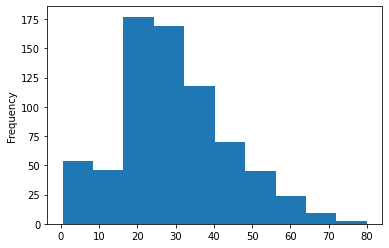

In [103]:
titantic_df['Age'].plot.hist()

<AxesSubplot:>

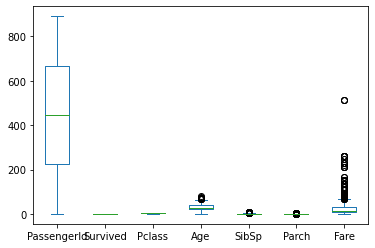

In [105]:
titantic_df.plot.box()

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

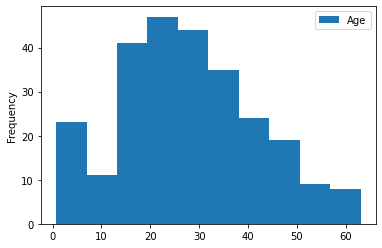

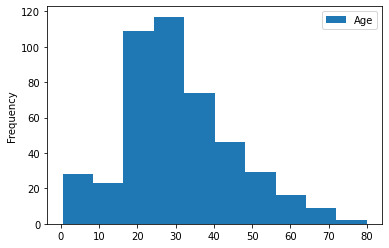

In [118]:
titantic_df.groupby('Sex')[['Age']].plot.hist()

/opt/conda/envs/python_CS703_f22/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:ylabel='Density'>

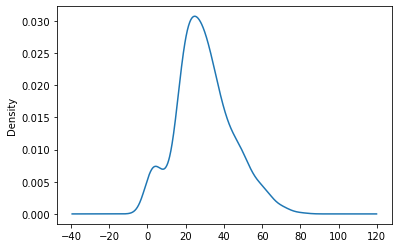

In [119]:
titantic_df['Age'].plot.kde()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

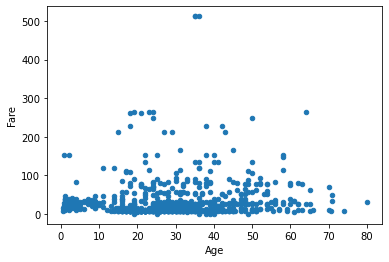

In [121]:
titantic_df.plot.scatter(x='Age', y='Fare')

array([<AxesSubplot:title={'center':'Fare'}>,
       <AxesSubplot:title={'center':'Age'}>], dtype=object)

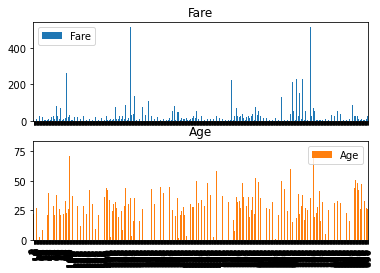

In [146]:
titantic_df[['Fare', 'Age']].plot.bar(subplots=True)

<AxesSubplot:>

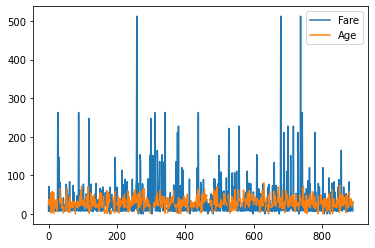

In [148]:
titantic_df[['Fare', 'Age']].plot()